In [10]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [11]:
data_folder = './data/task7/'
cars_folder = data_folder + 'cars/'
moto_folder = data_folder + 'moto/'

In [12]:
winSize = (256, 192)
blockSize = (16, 16)
blockStride = (8, 8)
cellSize = (8, 8)
nbins = 9
hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)

In [13]:
def get_img_descriptors(folder):
    data = []
    for filename in os.listdir(folder):
        img = cv2.imread(folder + filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        data.append(hog.compute(img).flatten())
    return data

In [14]:
cars = get_img_descriptors(cars_folder)
moto = get_img_descriptors(moto_folder)

In [15]:
X = np.concatenate((cars, moto))
y = np.concatenate((np.full((len(cars)), 1, dtype=np.int), np.full((len(moto)), -1, dtype=np.int)))

In [7]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=10)
svc = SVC(kernel='linear', random_state=42)
svc_rfb = SVC(kernel='rbf', random_state=42)
models = {
    'knn': knn,
    'svm linear': svc,
    'svm rbf': svc_rfb
}

In [16]:
results = {model_name: {} for model_name in models}
n_iters = 20
for train_size in np.linspace(0.1, 0.9, 9):
    for model_name in models:
        results[model_name][str(train_size)] = []
    for i in range(n_iters):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=i, stratify=y)
        for model_name, model in models.items():
            model.fit(X_train, y_train)
            score = accuracy_score(y_test, model.predict(X_test))
            results[model_name][str(train_size)].append(score)

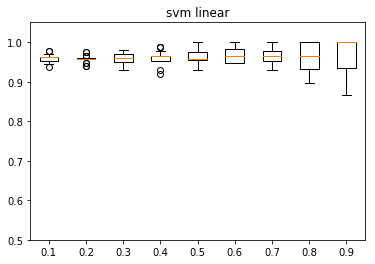

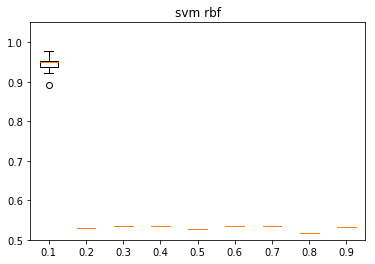

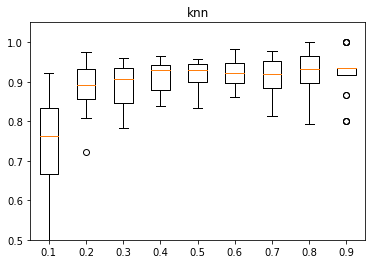

In [17]:
for i, model_name in enumerate(models):
    plt.figure()
    plt.title(model_name)
    plt.ylim(0.5, 1.05)
    plt.boxplot([results[model_name][key] for key in sorted(results[model_name].keys())], 
                labels=sorted(results[model_name].keys()))
    plt.show()